# $1.$ Dataset Preparation 

In [5]:
import numpy as np
import pandas as pd

# $a.$ Defining and preparing class variables (1 pt)

#### We aim to utilize our dataset to predict level of diabetes in a patient, (e.g. no diabetes, prediabetes, diabetes). Each patient was asked 21 questions regarding his/her health, habits, education, and income history. Although we have the same data type (float64) for each of our features, based on the documentation on Kaggle, we do have 4 distinct categorical features:

#### $GenHlth, Age, Education, and Income.$

#### Each category is described as follows:

##### $Diabetes 012 - Diabetes Scale$

                            0 = No Diabetes

                            1 = Prediabetes
                            
                            2 = Diabetes


##### $GenHlth - General Health$

                            1 = Excellent
                            
                            2 = Very Good
                            
                            3 = Good
                            
                            4 = Fair
                            
                            5 = Poor

##### $Age - Age Category$

                            1 = 18 - 24 yrs
                            2 = 25 - 29 yrs
                            3 = 30 - 34 yrs
                            4 = 35 - 39 yrs
                            5 = 40 - 44 yrs
                            6 = 45 - 49 yrs
                            7 = 50 - 54 yrs
                            8 = 55 - 59 yrs
                            9 = 60 - 64 yrs
                            10 = 65 - 69 yrs
                            11 = 70 - 74 yrs
                            12 = 75 - 79 yrs
                            13 = 80 yrs or older

##### $Education - Education Level$

                            1 = Never attended school or only kindergarten
                            
                            2 = Grades 1 through 8 (Elementary)
                            
                            3 = Grades 9 through 11 (Some high school)
                            
                            4 = Grade 12 or GED (High school graduate)
                            
                            5 = College 1 year to 3 years (Some college or technical school)
                            
                            6 = College 4 years or more (College graduate)
                            
##### $Income - Income Scale$

                            1 = less than $10,000
                          
                            2 = less than $15,000, more than $10,000
                            
                            3 = less than $20,000, more than $15,000
                            
                            4 = less than $25,000, more than $20,000
                            
                            5 = less than $35,000, more than $25,000
                            
                            6 = less than $50,000, more than $35,000
                            
                            7 = less than $75,000, more than $75,000
                            
                            8 = more than $75,000

In [177]:
df = pd.read_csv('Diabetes_Dataset/diabetes_012_health_indicators_BRFSS2015.csv')
# ========================================================
from copy import deepcopy
df_target = deepcopy(df)
# ========================================================
# df_target.drop(df_target.tail(252000).index,inplace = True) # lets keep the entire dataset for now

print(df_target.info())

#show df
pd.set_option('display.max_columns', None)
df_target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


###### Checking for missing values

In [178]:
if df_target.isnull().sum().any() == False:
    print('There are no missing values')
else:
    print('There are missing values')

There are no missing values


###### Encoding categorical features, normalizing numerical variables, and converting binary variables to integers

In [182]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
# ========================================================
df_encode = deepcopy(df_target)
# ========================================================
# for every categorical variable, encode as integer
# Keras will use the integer variable to figure out how to one-hot encode    
encoders = dict() # save each encoder in dictionary
categorical_headers = ['Diabetes_012', 'GenHlth','Age','Education','Income']

for col in categorical_headers:
        encoders[col] = LabelEncoder() # save the encoder
        df_encode[col] = encoders[col].fit_transform(df_encode[col])
# ========================================================
# scale the numeric, continuous variables
numerical_headers = ["BMI", "MentHlth", "PhysHlth"]

for col in numerical_headers:
    ss = StandardScaler()
    df_encode[col] = ss.fit_transform(df_encode[col].values.reshape(-1,1))
# ========================================================
# converting binary variables to integers
binary_headers = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack',
                  'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex',]
for col in binary_headers:
    df_encode[col] = df_encode[col].astype(int)
    
print(df_encode.info())
df_encode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  int64  
 1   HighBP                253680 non-null  int64  
 2   HighChol              253680 non-null  int64  
 3   CholCheck             253680 non-null  int64  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int64  
 6   Stroke                253680 non-null  int64  
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   PhysActivity          253680 non-null  int64  
 9   Fruits                253680 non-null  int64  
 10  Veggies               253680 non-null  int64  
 11  HvyAlcoholConsump     253680 non-null  int64  
 12  AnyHealthcare         253680 non-null  int64  
 13  NoDocbcCost           253680 non-null  int64  
 14  GenHlth               253680 non-null  int64  
 15  

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,1.757936,1,0,0,0,0,1,0,1,0,4,1.998592,1.233999,1,0,8,3,2
1,0,0,0,0,-0.511806,1,0,0,1,0,0,0,0,1,2,-0.429630,-0.486592,0,0,6,5,0
2,0,1,1,1,-0.057858,0,0,0,0,1,0,0,1,1,4,3.617407,2.954590,1,0,8,3,7
3,0,1,0,1,-0.209174,0,0,0,1,1,1,0,1,0,1,-0.429630,-0.486592,0,0,10,2,5
4,0,1,1,1,-0.663122,0,0,0,1,1,1,0,1,0,1,-0.024926,-0.486592,0,0,10,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,2.514516,0,0,0,0,1,1,0,1,0,2,-0.429630,0.086938,0,1,4,5,6
253676,2,1,1,1,-1.571019,0,0,0,0,0,0,0,1,0,3,-0.429630,-0.486592,1,0,10,1,3
253677,0,0,0,1,-0.057858,0,0,0,1,1,0,0,1,0,0,-0.429630,-0.486592,0,0,1,4,1
253678,0,1,0,1,-0.814438,0,0,0,0,1,1,0,1,0,2,-0.429630,-0.486592,0,1,6,4,0


#### As evident above, our integer encoded features are stored as int64 datatypes and our continuous numerical variables are stored as float64. Once again, we will be grappling with a multi-class classification problem. Since keras can one-hot encode on its own when given integer encoded variables, we simply integer encode the target column as we did with the other categorical features. This will also be useful in our data splitting method, since the method we intend to implement cannot work with one-hot encoded variables that produce multi-label indicator target types.

###### Defining features and target

In [202]:
target = ['Diabetes_012']
X = df_encode.drop(target, axis=1); y = df_encode.Diabetes_012

In [252]:
# Features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  int64  
 1   HighChol              253680 non-null  int64  
 2   CholCheck             253680 non-null  int64  
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  int64  
 5   Stroke                253680 non-null  int64  
 6   HeartDiseaseorAttack  253680 non-null  int64  
 7   PhysActivity          253680 non-null  int64  
 8   Fruits                253680 non-null  int64  
 9   Veggies               253680 non-null  int64  
 10  HvyAlcoholConsump     253680 non-null  int64  
 11  AnyHealthcare         253680 non-null  int64  
 12  NoDocbcCost           253680 non-null  int64  
 13  GenHlth               253680 non-null  int64  
 14  MentHlth              253680 non-null  float64
 15  

In [208]:
# Targets
from sklearn.utils.multiclass import type_of_target
print('For our classification task we have a total of: ', len(np.unique(y)), ' classes\n\nThus we have a ' + str(type_of_target(y)) + ' target.')
print(y)

For our classification task we have a total of:  3  classes

Thus we have a multiclass target.
0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    2
253677    0
253678    0
253679    2
Name: Diabetes_012, Length: 253680, dtype: int64


## $b.$ Identifying cross-product features (1 pt)

#### To determine potential candidates for cross-product feature pairing, we decided to generate a correlation matrix that exhibits how well-correlated certain features are to one another in our dataset. 

<AxesSubplot:>

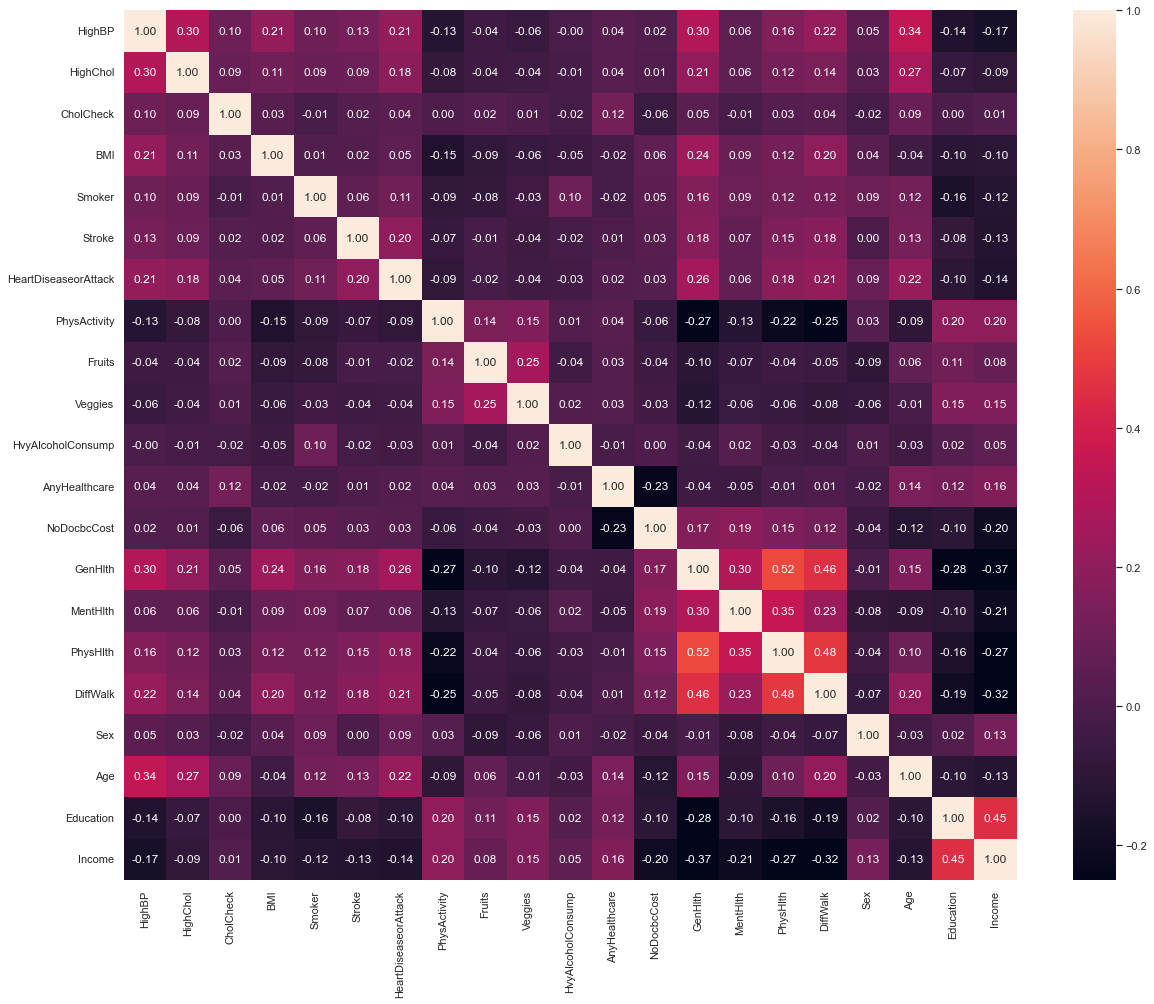

In [249]:
import seaborn as sns
 
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

# f, ax = plt.subplots(figsize=(15, 15))
fig = plt.figure(figsize=(20,16))
sns.heatmap(X.corr(), cmap=cmap, annot=True, vmin=-0.25, vmax=1, fmt=".2f")

In [259]:
categorical_headers = ['GenHlth','Age','Education','Income']
for col in categorical_headers:
    vals = X[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals)

GenHlth has 5 unique values:
[4 2 1 3 0]
Age has 13 unique values:
[ 8  6 10  9  7 12  3  5  1 11  4  0  2]
Education has 6 unique values:
[3 5 2 4 1 0]
Income has 8 unique values:
[2 0 7 5 3 6 1 4]


In [269]:
%%time
cross_columns = [['Education','Income'],
                 ['Education', 'Income', 'Age'],
                 ['PhysHlth', 'DiffWalk'],
                 ['MentHlth', 'PhysHlth'],
                 ['GenHlth', 'DiffWalk'],
                 ['GenHlth', 'PhysHlth'],
                 ['GenHlth', 'PhysHlth', 'MentHlth'],
                 ['GenHlth', 'PhysHlth', 'DiffWalk']]

cross_col_df_names= []
for cols_list in cross_columns:
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed = X[cols_list].astype(str).agg('_'.join, axis=1)
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(X_crossed)
    
    # 3. Save into dataframe with new name
    X[cross_col_name] = enc.transform(X_crossed)
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name)

X.head()

CPU times: user 44.8 s, sys: 1.15 s, total: 45.9 s
Wall time: 46.1 s


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Education_Income,Education_Income_Age,PhysHlth_DiffWalk,MentHlth_PhysHlth,GenHlth_DiffWalk,GenHlth_PhysHlth,GenHlth_PhysHlth_MentHlth,GenHlth_PhysHlth_DiffWalk
0,1,1,1,1.757936,1,0,0,0,0,1,0,1,0,4,1.998592,1.233999,1,0,8,3,2,26,310,31,458,9,139,1978,271
1,0,0,0,-0.511806,1,0,0,1,0,0,0,0,1,2,-0.429630,-0.486592,0,0,6,5,0,40,490,8,92,4,66,789,125
2,1,1,1,-0.057858,0,0,0,0,1,0,0,1,1,4,3.617407,2.954590,1,0,8,3,7,31,375,61,712,9,154,2188,300
3,1,0,1,-0.209174,0,0,0,1,1,1,0,1,0,1,-0.429630,-0.486592,0,0,10,2,5,21,236,8,92,2,35,380,63
4,1,1,1,-0.663122,0,0,0,1,1,1,0,1,0,1,-0.024926,-0.486592,0,0,10,4,3,35,418,8,4,2,35,377,63


#### When determining which features to cross, we decided to set a correlation threshold of 0.35. This is an arbitrary metric implemented after analyzing the matrix. We concluded that MentHlth and PhyHlth should definitely be crossed due to one's affect on another and vice versa. Their correlation was 0.35, as a result this is what we chose as the threshold. We found 4 other pairs of features that surpassed this value (see above). Moreover, we chose to append Age to Education and Income because it is obvious that, as people get older, their education levels and income tend to increase. We also decided to append MentHlth to the GenHlth and PhysHlth pair because it surpasses the threshold mark with each of the aforementioned features. We followed the same approach with DiffWalk.

## $c.$ Choosing evaluation metric (1 pt)

#### To determine the type of evaluation metric to implement we will quantify the class imbalance in our target feature Diabetes_012.

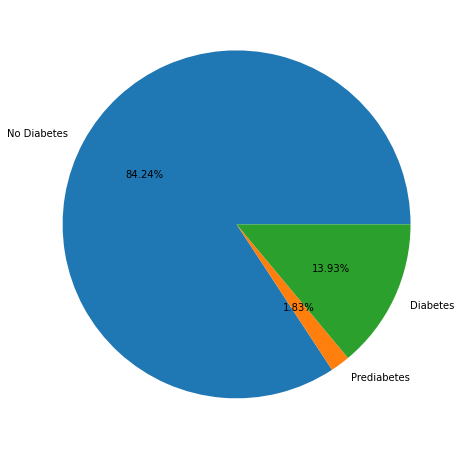

In [226]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
plt.pie(np.bincount(y), labels=['No Diabetes', 'Prediabetes', 'Diabetes'], autopct='%.2f%%')
plt.show()

#### We conclude that we are dealing with a relatively large class imbalance. As a result, we decided to implement the F1-score evaluation metric. The class imbalance is a problem for other evaluation metrics such as accuracy because, on any random guess the model would still be correct most of the time (84% of the time in our case). This metric is also essential for the task at hand in any deployment of this model because, based on the World Health Organization (WHO), in 2014 8.4% of adults aged 18 years or older were diagnosed with diabetes. As a result, any survey that collects responses from a random grouping of people will tend to lean toward this imbalance in their responses as well. Therefore, consistently generating datasets that would be characterized by dramatic class imbalances. Interestingly, we actually see a slightly higher percentage in those who have been diagnosed with diabetes in our respective dataset. The responses for the survey used to produce this dataset were from the year 2015 and the respondents were randomly chosen. 

## $d.$ Choosing method to split data into test and training sets (1 pt)

Size of training set for each class:  [170963   3704  28277] and for test set is:  [42740   927  7069]


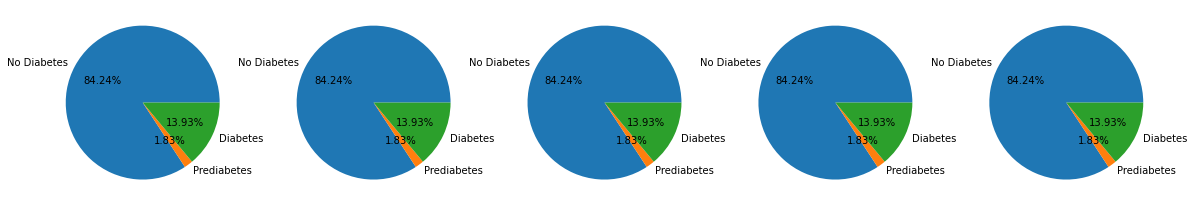

In [239]:
from sklearn.model_selection import StratifiedKFold
K = 5
skfold = StratifiedKFold(n_splits=K, random_state=1, shuffle=True)

fig = plt.figure(figsize=(20, 8))

i = 1
for train_idx, test_idx in skfold.split(X, y):
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    ax = fig.add_subplot(1,K,i)
    plt.pie(np.bincount(y_train), labels=['No Diabetes', 'Prediabetes', 'Diabetes'], autopct='%.2f%%')
    i += 1
print('Size of training set for each class: ', np.bincount(y_train), 'and for test set is: ', np.bincount(y_test))

#### To split our dataset, we chose to implement a stratified K-fold approach due to the inherent class imbalance. Also, due to how large our dataset is, we concluded that a 80/20 split would suffice between our training and test set, therefore we decided to utilize 5 folds. As seen above, we have mitigated the predicaments otherwise evident in randomly splitting the data insofar that we maintain the ratio between our multi-class features seen in the complete dataset (i.e., the ratio between No Diabetes/Diabetes, PreDiabetes/No Diabetes, and Prediabetes/Diabetes within each fold is the same as what we see in the original dataset -- See "Choosing evaluation metric").

# $2.$ Modeling